<a href="https://colab.research.google.com/github/GreatlyHizkia/PortofolioSales-Python/blob/main/Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
# Import the packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Read in the data

file_path = '/content/drive/MyDrive/ANALYZE/Supermarket Sales - Python Project.xlsx'
df = pd.read_excel(file_path)

In [89]:
# Take a look at the data
df

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7
...,...,...,...,...,...,...,...,...,...,...
995,2019-01-29,Ewallet,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1
996,2019-03-02,Ewallet,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10
997,2019-02-09,Cash,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1
998,2019-02-22,Cash,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1


In [90]:
# Showing first 5 linesClick to apply
print(df.head())

# Showing columns name
print(df.columns)

# Count how many columns and rows in data
print(df.shape)



        Date      Payment   Invoice ID Branch       City Customer type  \
0 2019-01-05      Ewallet  750-67-8428      A     Yangon        Member   
1 2019-03-08         Cash  226-31-3081      C  Naypyitaw        Normal   
2 2019-03-03  Credit card  631-41-3108      A     Yangon        Normal   
3 2019-01-27      Ewallet  123-19-1176      A     Yangon        Member   
4 2019-02-08      Ewallet  373-73-7910      A     Yangon        Normal   

   Gender            Product line  Unit price  Quantity  
0  Female       Health and beauty       74.69         7  
1  Female  Electronic accessories       15.28         5  
2    Male      Home and lifestyle       46.33         7  
3    Male       Health and beauty       58.22         8  
4    Male       Sports and travel       86.31         7  
Index(['Date', 'Payment', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line', 'Unit price', 'Quantity'],
      dtype='object')
(1000, 10)


In [91]:
#  Seeing if there are any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Date - 0%
Payment - 0%
Invoice ID - 0%
Branch - 0%
City - 0%
Customer type - 0%
Gender - 0%
Product line - 0%
Unit price - 0%
Quantity - 0%


In [92]:
# Data types for each column
print(df.dtypes)



Date             datetime64[ns]
Payment                  object
Invoice ID               object
Branch                   object
City                     object
Customer type            object
Gender                   object
Product line             object
Unit price              float64
Quantity                  int64
dtype: object


In [93]:
# Check Highest and lowest Price from UnitPrice
print("Highest Price:", df["Unit price"].max())
print("Lowest Price:", df["Unit price"].min())

# Seeing what cities are in the data
print(df["City"].unique())


Highest Price: 99.96
Lowest Price: 10.08
['Yangon' 'Naypyitaw' 'Mandalay']


In [94]:
# Make new Column as Total Revenue
df["Total Revenue"] = df["Unit price"] * df["Quantity"]
print(df.head())

        Date      Payment   Invoice ID Branch       City Customer type  \
0 2019-01-05      Ewallet  750-67-8428      A     Yangon        Member   
1 2019-03-08         Cash  226-31-3081      C  Naypyitaw        Normal   
2 2019-03-03  Credit card  631-41-3108      A     Yangon        Normal   
3 2019-01-27      Ewallet  123-19-1176      A     Yangon        Member   
4 2019-02-08      Ewallet  373-73-7910      A     Yangon        Normal   

   Gender            Product line  Unit price  Quantity  Total Revenue  
0  Female       Health and beauty       74.69         7         522.83  
1  Female  Electronic accessories       15.28         5          76.40  
2    Male      Home and lifestyle       46.33         7         324.31  
3    Male       Health and beauty       58.22         8         465.76  
4    Male       Sports and travel       86.31         7         604.17  


In [95]:
# Calculate the total sales of all data
print(df["Total Revenue"].sum())

307587.38


In [96]:
# Total Sales each city
city_sales = df.groupby("City")["Total Revenue"].sum()
print(city_sales)


City
Mandalay     101140.64
Naypyitaw    105303.53
Yangon       101143.21
Name: Total Revenue, dtype: float64


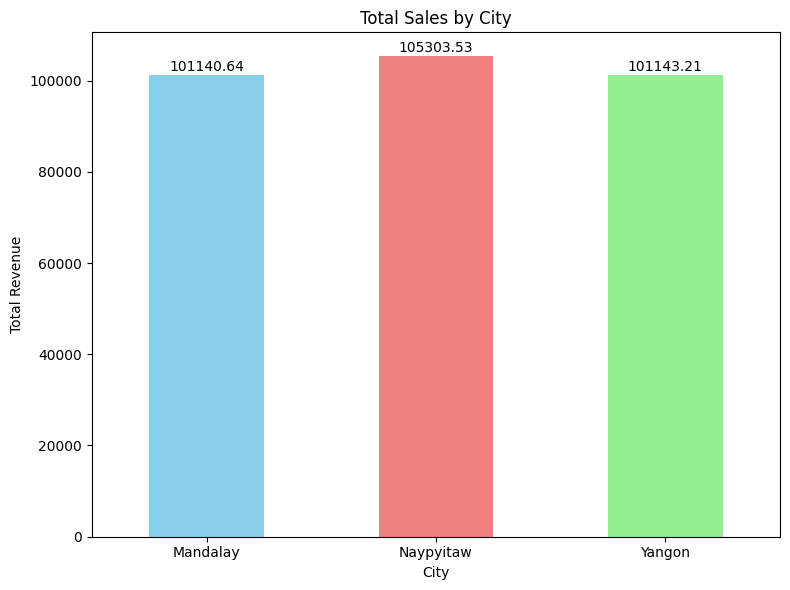

In [97]:
# Make Charts
plt.figure(figsize=(8, 6))
ax = city_sales.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)

# Add the sales numbers on top of the bars
for i, v in enumerate(city_sales):
    ax.text(i, v + 1000, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()

In [98]:
# Total sales by Product
product_sales = (df.groupby)("Product line")["Total Revenue"].sum().sort_values(ascending=True)
print(product_sales)

Product line
Health and beauty         46851.18
Home and lifestyle        51297.06
Fashion accessories       51719.90
Electronic accessories    51750.03
Sports and travel         52497.93
Food and beverages        53471.28
Name: Total Revenue, dtype: float64


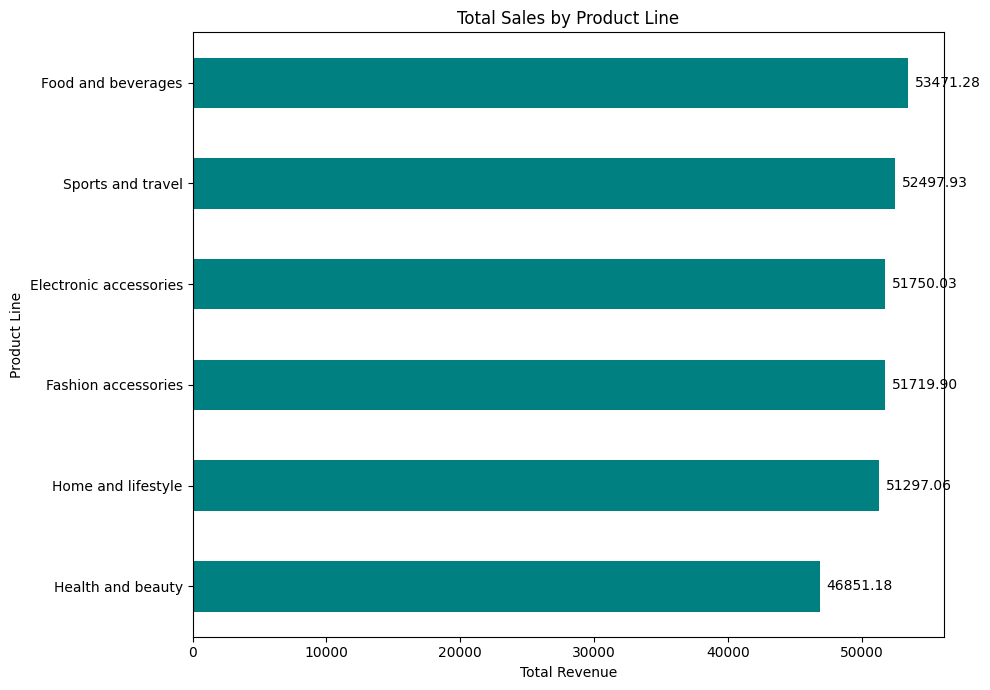

In [99]:
plt.figure(figsize=(10, 7))
ax = product_sales.plot(kind='barh', color='teal')
plt.title('Total Sales by Product Line')
plt.xlabel('Total Revenue')
plt.ylabel('Product Line')
# Adjust text label positioning for horizontal bars
for i, v in enumerate(product_sales):
    ax.text(v + 500, i, f"{v:.2f}", va='center')


plt.tight_layout()
plt.show()

In [100]:
# Total sales by gender
gender_sales = df.groupby("Gender")["Total Revenue"].sum()
print(gender_sales)

Gender
Female    159054.38
Male      145383.60
female       599.37
fml          234.75
male        2315.28
Name: Total Revenue, dtype: float64


In [101]:
# Standardize column gender
df["Gender"] = df["Gender"].str.lower()
df["Gender"] = df["Gender"].replace({
    "fml": "female",
    "f": "female",
    "m": "male"
    })
df["Gender"] = df["Gender"].str.capitalize()

print(df["Gender"].unique())
df[["Gender"]].head()

['Female' 'Male']


,Gender
0,Female
1,Female
2,Male
3,Male
4,Male


In [102]:
# Total sales by gender
gender_sales = df.groupby("Gender")["Total Revenue"].sum()
print(gender_sales)

# Total Sales by gender in percent
gender_sales_percent = gender_sales / gender_sales.sum() * 100
print(gender_sales_percent)

Gender
Female    159888.50
Male      147698.88
Name: Total Revenue, dtype: float64
Gender
Female    51.981489
Male      48.018511
Name: Total Revenue, dtype: float64


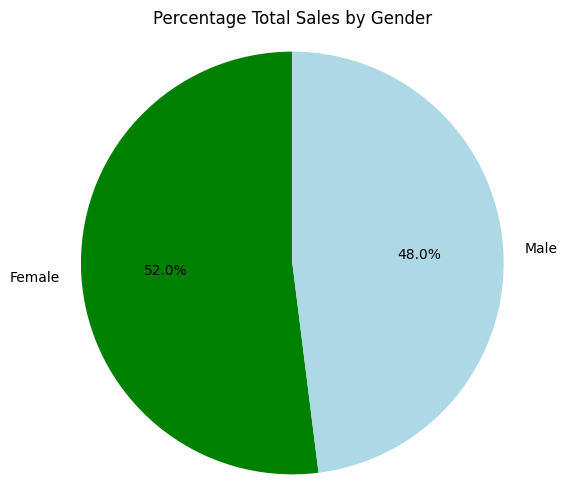

In [103]:
# Total sales by gender in percent
gender_sales_percent = gender_sales / gender_sales.sum() * 100

plt.figure(figsize=(6, 6))
plt.pie(gender_sales_percent,
        labels=gender_sales_percent.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['green', 'lightblue'])
plt.title('Percentage Total Sales by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [104]:
# Combining Product Line and Gender
product_gender_combined = df.groupby(["Product line", "Gender"])["Total Revenue"].sum()
print(product_gender_combined)

# Make pivot tabel
product_gender_pivot = df.pivot_table(
    values = "Total Revenue",
    index = "Product line",
    columns = "Gender",
    aggfunc = "sum")
print(product_gender_pivot)

Product line            Gender
Electronic accessories  Female    25811.45
                        Male      25938.58
Fashion accessories     Female    28988.00
                        Male      22731.90
Food and beverages      Female    31591.35
                        Male      21879.93
Health and beauty       Female    17677.13
                        Male      29174.05
Home and lifestyle      Female    28606.55
                        Male      22690.51
Sports and travel       Female    27214.02
                        Male      25283.91
Name: Total Revenue, dtype: float64
Gender                    Female      Male
Product line                              
Electronic accessories  25811.45  25938.58
Fashion accessories     28988.00  22731.90
Food and beverages      31591.35  21879.93
Health and beauty       17677.13  29174.05
Home and lifestyle      28606.55  22690.51
Sports and travel       27214.02  25283.91


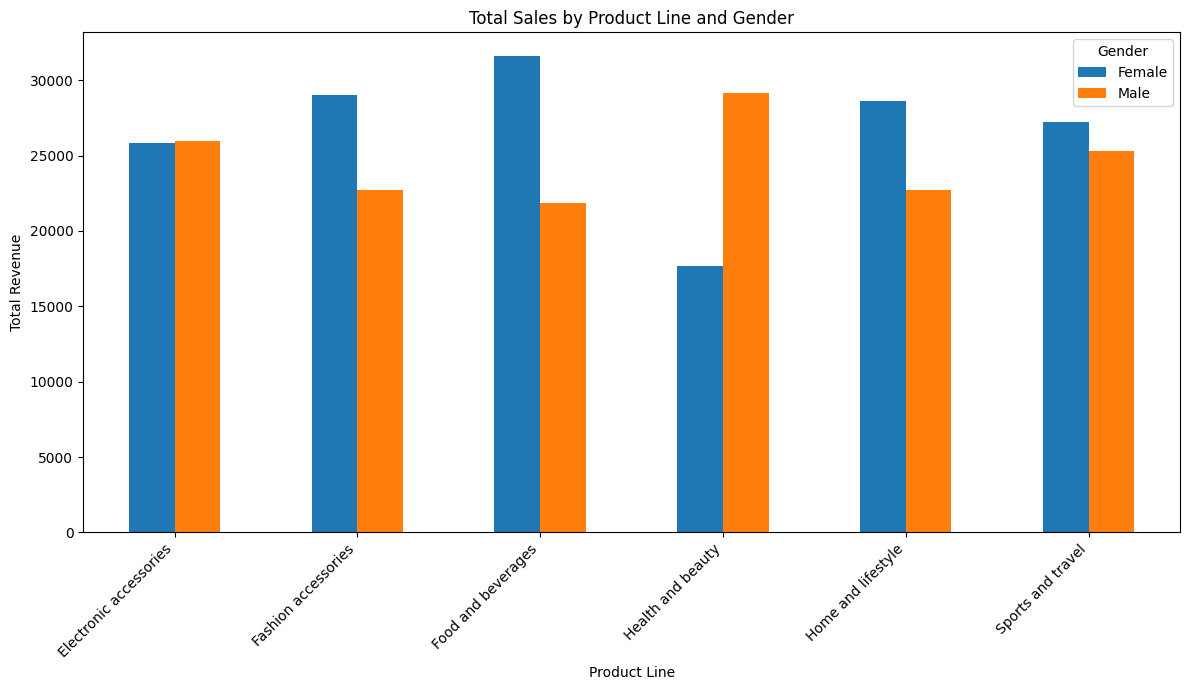

In [105]:
product_gender_pivot.plot(kind='bar', figsize=(12, 7))
plt.title('Total Sales by Product Line and Gender')
plt.xlabel('Product Line')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()



Customer type
Member    156403.28
Normal    151184.10
Name: Total Revenue, dtype: float64
Customer type
Member    50.848406
Normal    49.151594
Name: Total Revenue, dtype: float64


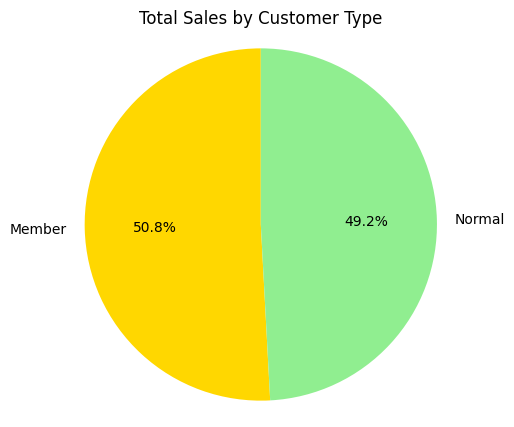

In [106]:
# Total sales by customer type
customer_type_sales = df.groupby("Customer type")["Total Revenue"].sum()
print(customer_type_sales)

# In percent
customer_type_sales_percent = customer_type_sales / customer_type_sales.sum() * 100
print(customer_type_sales_percent)

plt.figure(figsize=(5, 5))
plt.pie(
    customer_type_sales,
    labels=customer_type_sales.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["gold", "lightgreen"]
)
plt.title("Total Sales by Customer Type")
plt.axis("equal")
plt.show()



Payment
Cash           106863.40
Credit card     95968.64
Ewallet        104755.34
Name: Total Revenue, dtype: float64
Payment
Cash           34.742453
Credit card    31.200448
Ewallet        34.057099
Name: Total Revenue, dtype: float64


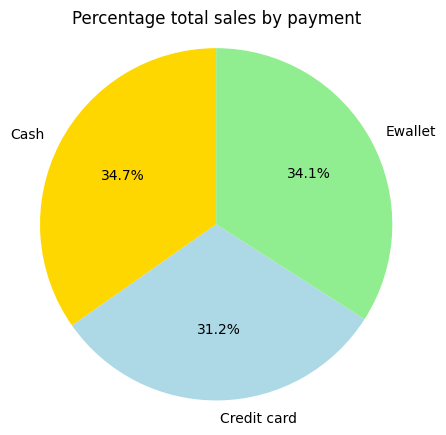

In [107]:
# Total sales by payment method
payment_sales = df.groupby("Payment")["Total Revenue"].sum()
print(payment_sales)
# In percent
payment_sales_percent = payment_sales / payment_sales.sum() * 100
print(payment_sales_percent)
# Make chart
plt.figure(figsize=(5, 5))
plt.pie(
    payment_sales,
    labels=payment_sales.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["gold", "lightblue", "lightgreen"]
)
plt.title("Percentage total sales by payment")
plt.axis("equal")
plt.show()


In [125]:
# Now i want to analyze total sales over time (Daily)
daily_sales = df.groupby("Date")["Total Revenue"].sum()
print(daily_sales)

# For now, I will only convert the 'Date' column to datetime
df["Date"] = pd.to_datetime(df["Date"])


# Calculate Total sales by each day
daily_sales = df.groupby("Date")["Total Revenue"].sum()
print(daily_sales)




Date
2019-01-01    4519.22
2019-01-02    1852.86
2019-01-03    1979.17
2019-01-04    1546.37
2019-01-05    3368.27
               ...   
2019-03-26    1869.06
2019-03-27    2764.59
2019-03-28    2123.24
2019-03-29    3831.66
2019-03-30    4273.39
Name: Total Revenue, Length: 89, dtype: float64
Date
2019-01-01    4519.22
2019-01-02    1852.86
2019-01-03    1979.17
2019-01-04    1546.37
2019-01-05    3368.27
               ...   
2019-03-26    1869.06
2019-03-27    2764.59
2019-03-28    2123.24
2019-03-29    3831.66
2019-03-30    4273.39
Name: Total Revenue, Length: 89, dtype: float64


In [132]:
# Now I will see which date has the highest sales.
print(daily_sales.idxmax())
print(daily_sales.max())

max_date = daily_sales.idxmax()
max_value = daily_sales.max()

2019-03-09 00:00:00
7118.14


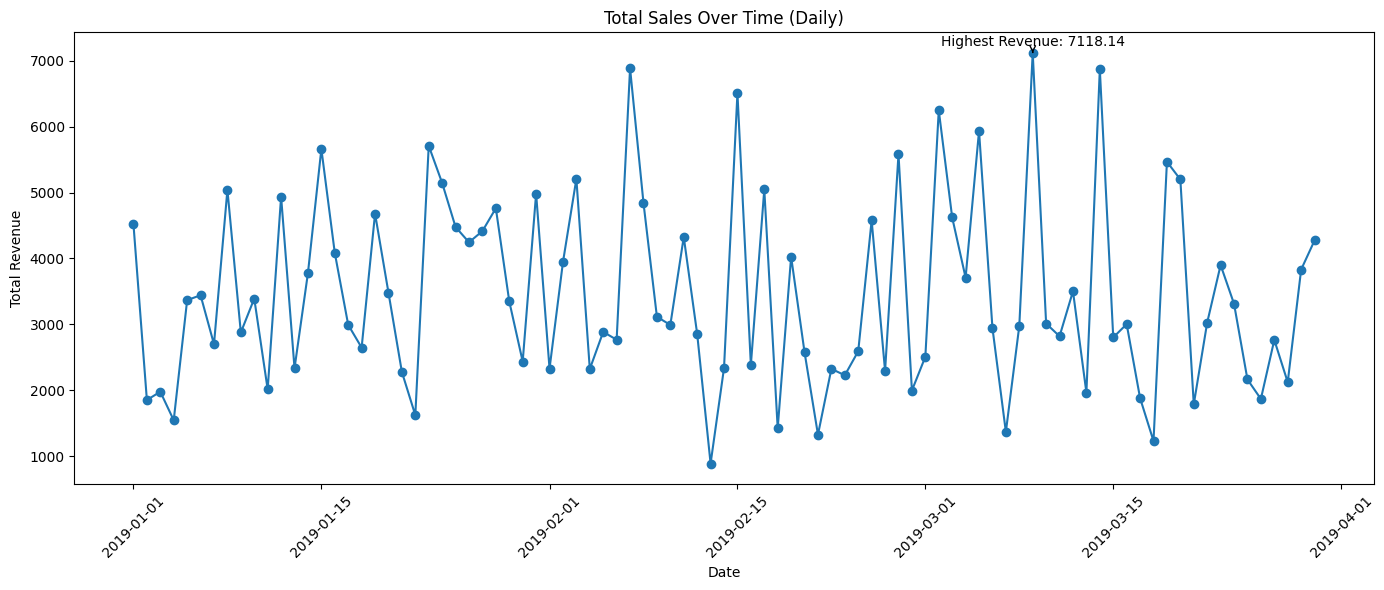

In [134]:
# Make a chart
plt.figure(figsize=(14, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
plt.title("Total Sales Over Time (Daily)")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

# Add highest point annotation
plt.annotate(
    f"Highest Revenue: {max_value:.2f}",
    xy=(max_date, max_value),
    xytext=(max_date, max_value + 100),
    arrowprops=dict(facecolor='red', arrowstyle='->'),
    ha='center'
)

plt.tight_layout()
plt.show()